# Aula 4 - KNN e ferramentas especiais

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) KNN
- 2) Ferramentas Especiais
- 3) KNN para regressão

In [1]:
%load_ext autoreload
%autoreload 2

In [98]:
from ml_utils import *

____
____
____

## 1) KNN

Hoje conheceremos um novo algoritmo de aprendizagem (que inicialmente veremos no contexto de classificação): o KNN, que é a sigla de **k nearest neighbors**, ou seja, **k vizinhos mais próximos**.

A ideia é bem simples: tomamos uma base de treino classificada (supervisionada). 

A cada observação de teste que queiramos classificar, tomamos **a classe como sendo a classe das $k$ observações que estão mais próximas do elemento a ser classificado**

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" width=600>

Este algoritmo é muito simples e intuitivo, mas há dois elementos de extrema importância:

> Como medir a **distância** entre dados? Qual é a **métrica** adequada?

Veremos que o sklearn nos permite escolher diferentes métricas de distância, o que é ótimo, pois assim podemos seguir a habitual abordagem: testar diferentes métricas, e escolher a que der melhores resultados!

<img src=https://miro.medium.com/max/1400/1*FTVRr_Wqz-3_k6Mk6G4kew.png width=500>

> Qual é o número de vizinhos adequados: i.e., **como escolher $k$?**

Essa é uma escolha particularmente importante, pois escolhas diferentes de $k$ podem facilmente levar a classificações diferentes:

<img src="https://helloacm.com/wp-content/uploads/2016/03/2012-10-26-knn-concept.png" width=400>

Veremos logo como escolher bons valores!

> **Reflita e responda**: como a escolha de $k$ influencia a performance de generalização do modelo (isto é, seu comportamento no que diz respeito ao trade-off viés-variância)?
><br><br>Dica: pense no que acontece nos extremos, $k=1$ e $k=N$, ond $N$ é o número de observações na base de treino.

Conclusão: 

- $k=1$ temos alta variância (overfitting - pense nos outliers!).

- $k=N$ temos alto viés (underfitting - não aprendemos nada, só predizemos diretamente a classe majoritária na base de treino).

Pra ilustrar este ponto, veja este site: http://vision.stanford.edu/teaching/cs231n-demos/knn/

Valeo, Theo!

As etapas do algoritmo são as seguintes:

1. Recebe um dado não classificado;
2. Mede sua distância (de acordo com a métrica desejada) a cada um dos elementos da base de treino;
3. Obtém um *ranking* das distâncias, em ordem decrescente;
4. Verifica a classe de cada da um dos *K* dados que tiveram a menor distância e conta a quantidade de cada classe;
5. Toma como resultado a classe que mais apareceu (moda) dentre os dados que tiveram as menores distâncias;
6. Classifica o novo dado com a classe tomada como resultado da classificação.

KNN é um método _lazy learner_ -- Ou seja, **não há uma etapa explícita de treinamento**, conforme vimos antes.

Cada observação de teste é classificada por vez, segundo o passo a passo acima.

> **MUITO IMPORTANTE**: sempre devemos **escalar os dados** quando formos construir um modelo KNN! Reflita: por quê?

#### Lendo conjunto de dados

Como exemplo vamos utilizar dados de câncer de mama (o dataset que foi sugerido como exercício!), eles estão disponiveis no [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) ou pelo [kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). 

A ideia é que consigamos construir um modelo para classificar, com base em medidas fisiológicas, se um tumor é maligno ou benigno.

In [3]:
df = pd.read_csv("../datasets/breast_cancer.csv")

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

A coluna de ID não dá nenhuma informação relevante: podemos eliminá-la

In [7]:
df = df.drop(columns=["id"])

Explore os dados! Essa é uma base muito rica, com muitas colunas! Aproveite este exemplo concreto para fazer muitas perguntas e respondê-las! Faça visualizações sempre que achar interessante!

Vamos fazer um apenas pra treinar:

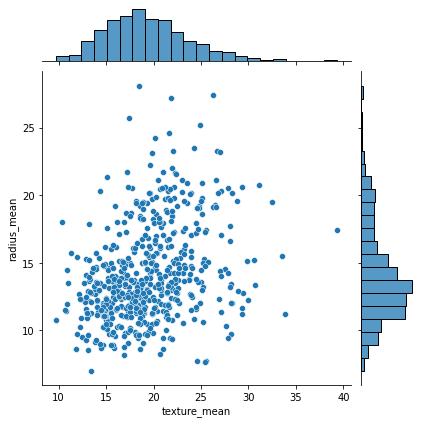

In [8]:
sns.jointplot(data = df, x="texture_mean", y="radius_mean");

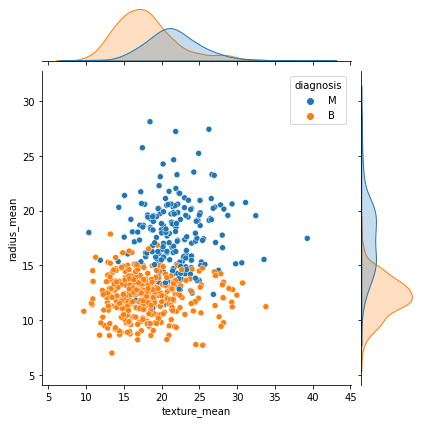

In [9]:
sns.jointplot(data = df, x="texture_mean", y="radius_mean", hue="diagnosis");

In [10]:
df.shape

(569, 31)

Uma pergunta é bastante importante: **as classes aparecem balanceadas, ou há algum desbalanço?**

In [11]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
df["diagnosis"].value_counts(normalize=True)*100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

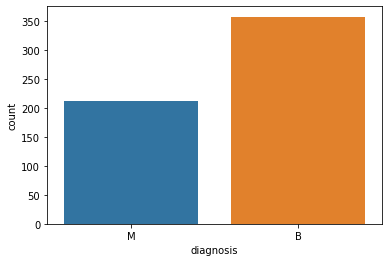

In [13]:
sns.countplot(data=df, x="diagnosis")

Há um leve desbalanceamento: há mais dados de tumores benignos do que malignos. 

Como o desbalanceamento não é tão gritante assim (coisa de 80-20), e este desbalanço é algo natural, não vamos tratar este caso, vamos deixar para tratar um caso mais crítico.

[Clique aqui](https://machinelearningmastery.com/what-is-imbalanced-classification/) para saber um pouco mais sobre desbalanceamento de classes; e [aqui](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/) caso você queira saber algumas formas de endereçar este problema (spoilers!).

Uma coisa importante é sempre setar o parâmetro `stratify` do train-test split, que vai garantir a mesma distribuição do target em ambos os conjuntos de treino e de teste! Isso faz com que a diferença na distribuição não se torne um fator adicional de viés na avaliação do modelo!

In [14]:
X = df.drop(columns="diagnosis")
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)

In [15]:
df["diagnosis"].value_counts(normalize=True)*100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

In [16]:
y_train.value_counts(normalize=True)*100

B    62.637363
M    37.362637
Name: diagnosis, dtype: float64

In [17]:
y_test.value_counts(normalize=True)*100

B    63.157895
M    36.842105
Name: diagnosis, dtype: float64

_____

**Transformando os dados**

O primeiro processo que pode ser feito para tunning do KNN é a **transformação das features**. 

Devido ao KNN utilizar **distâncias** como critério para classificação, ter as variaveis transformadas garante que sejam eliminados viéses relacionados à escala dos dados.

Para **escalar os dados**, o sklearn nos proporciona diversos **scalers**. Já conhecemos o [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Outra opção é o [StandardScaler.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

É **muito importante** que os transformers sejam fitados **com os dados de treino**, para que informações da base de teste não sejam utilizadas no treinamento (conceito conhecido como [data leakage](https://machinelearningmastery.com/data-preparation-without-data-leakage/)).

No caso do standard scaler: o objetivo do `.fit()` é determinar a média $\mu$ e desvio padrão $\sigma$ dos dados, para que a normalização seja feita. Se calcularmos estes parâmetros usando **todos os dados**, estamos utilizando informações da base de teste -- o que, como sabemos, jamais deve ser feito!!

Por isso, sempre siga o seguinte passo-a-passo par aplicação de transformers:

- Primeiro, faça o train test split;
- Use o `.fit()` nos dados de **treino**;
- Use o `.transform()` pra trasnformar os dados de treino e de teste tbm -- com o **mesmo transformer treinado** com os dados de treino;

Começaremos com o  [standard scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) - **média 0 e std 1**

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X_train)

X_train_ss = pd.DataFrame(ss.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_ss = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)

In [19]:
X_train_ss.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-1.820278e-16,3.693017e-16,4.958183e-16,-1.049222e-16,1.141944e-16,-2.151972e-16,-1.908120e-16,4.245688e-17,5.368111e-18,9.882205e-18,...,-3.794279e-16,2.318048e-16,-2.820698e-16,-8.784182e-18,-2.200926e-16,-1.156584e-16,-5.856121e-17,-8.052167e-17,-4.902062e-16,-2.577913e-16
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-2.009730e+00,-2.265011e+00,-1.961360e+00,-1.433461e+00,-2.342455e+00,-1.568307e+00,-1.092835e+00,-1.236420e+00,-2.733834e+00,-1.791603e+00,...,-1.720204e+00,-2.286387e+00,-1.682868e+00,-1.212587e+00,-2.596976e+00,-1.442492e+00,-1.298977e+00,-1.729670e+00,-2.141576e+00,-1.602524e+00
25%,-6.869865e-01,-7.192578e-01,-6.877646e-01,-6.643427e-01,-7.599676e-01,-7.446452e-01,-7.311067e-01,-7.398554e-01,-7.042022e-01,-7.295506e-01,...,-6.805052e-01,-7.269867e-01,-6.949785e-01,-6.436573e-01,-7.475060e-01,-6.811748e-01,-7.355618e-01,-7.700379e-01,-6.377821e-01,-7.030095e-01
50%,-2.310610e-01,-1.207886e-01,-2.444667e-01,-3.143644e-01,-5.267576e-02,-2.145711e-01,-3.649669e-01,-3.954004e-01,-5.783428e-02,-2.031921e-01,...,-2.924054e-01,-6.996374e-02,-2.990905e-01,-3.561409e-01,-4.191078e-02,-2.454053e-01,-2.141609e-01,-2.170230e-01,-1.439281e-01,-2.222582e-01
75%,4.947835e-01,5.628428e-01,4.975359e-01,3.775369e-01,6.231343e-01,4.923801e-01,5.271006e-01,6.321626e-01,5.034376e-01,5.249492e-01,...,5.787764e-01,7.072664e-01,5.606441e-01,3.987080e-01,6.189186e-01,5.218523e-01,5.217957e-01,6.980537e-01,4.340876e-01,4.386715e-01
max,3.900239e+00,4.634299e+00,3.899731e+00,5.114742e+00,4.715773e+00,4.485809e+00,4.137033e+00,3.838961e+00,4.435961e+00,4.987148e+00,...,4.021630e+00,3.891934e+00,4.198771e+00,5.782013e+00,3.859114e+00,5.071677e+00,4.611335e+00,2.628551e+00,5.914120e+00,6.798089e+00


Outra opção é transformar os dados com o [min max scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - **deixa o espaço amostral entre 0 e 1**

Aqui, as mesmas considerações sobre o método `.fit()` são válidas! (E pra qualquer outro transformer)

In [20]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler().fit(X_train)

X_train_mms = pd.DataFrame(mms.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_mms = pd.DataFrame(mms.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train_mms.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.340058,0.328295,0.334641,0.218909,0.331876,0.259048,0.208960,0.243611,0.381299,0.264297,...,0.299591,0.370066,0.286122,0.173361,0.402252,0.221439,0.219781,0.396875,0.265846,0.190763
std,0.169392,0.145102,0.170804,0.152882,0.141835,0.165359,0.191420,0.197246,0.139628,0.147682,...,0.174352,0.162034,0.170208,0.143125,0.155063,0.153680,0.169382,0.229704,0.124272,0.119170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223816,0.224045,0.217297,0.117455,0.224205,0.136050,0.069166,0.097838,0.283081,0.156674,...,0.181074,0.252399,0.167962,0.081338,0.286469,0.116871,0.095327,0.220189,0.186675,0.107077
50%,0.300961,0.310788,0.292931,0.170901,0.324413,0.223606,0.139175,0.165706,0.373232,0.234322,...,0.248666,0.358742,0.235271,0.122444,0.395760,0.183767,0.183546,0.347079,0.247979,0.164305
75%,0.423778,0.409875,0.419529,0.276564,0.420161,0.340378,0.309747,0.368166,0.451515,0.341737,...,0.400391,0.484542,0.381443,0.230363,0.498118,0.301549,0.308067,0.557045,0.319732,0.242982
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Podemos testar também o [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) - **mediana 0 e IQR 1**

In [21]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler().fit(X_train)

X_train_rs = pd.DataFrame(rs.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_rs = pd.DataFrame(rs.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train_rs.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.195521,0.094212,0.206249,0.301728,0.038085,0.173457,0.290069,0.288189,0.047890,0.161971,...,0.232200,0.048781,0.238201,0.341666,0.030672,0.203990,0.170326,0.147827,0.134278,0.194676
std,0.847120,0.780829,0.844597,0.960860,0.723808,0.809281,0.795656,0.729656,0.828973,0.798008,...,0.794978,0.697994,0.797294,0.960413,0.732642,0.832151,0.796194,0.681906,0.933976,0.876865
min,-1.505089,-1.672429,-1.448488,-1.074114,-1.655539,-1.094348,-0.578496,-0.612980,-2.215892,-1.266171,...,-1.133820,-1.545350,-1.102065,-0.821638,-1.869891,-0.995062,-0.862775,-1.030349,-1.863704,-1.208977
25%,-0.385799,-0.466788,-0.373996,-0.335910,-0.511381,-0.428507,-0.291001,-0.251057,-0.535232,-0.419576,...,-0.308191,-0.458094,-0.315292,-0.275831,-0.516381,-0.362227,-0.414680,-0.376690,-0.460741,-0.421091
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.614201,0.533212,0.626004,0.664090,0.488619,0.571493,0.708999,0.748943,0.464768,0.580424,...,0.691809,0.541906,0.684708,0.724169,0.483619,0.637773,0.585320,0.623310,0.539259,0.578909
max,3.495858,3.708826,3.496327,5.210877,3.447648,3.799745,3.578107,3.086229,3.721139,4.137378,...,3.425791,2.762342,3.582177,5.888678,2.854914,4.419753,3.837807,1.938281,5.651852,6.149131


___________

Agora sim, com os dados escalados, estamos prontos para treinar e avaliar o modelo, com as features escaladas!

Classe: [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Nosso primeiro modelo será com os hiperparâmetros default!

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# ===================================

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)

# ===================================

ss = StandardScaler().fit(X_train)

X_train_ss = pd.DataFrame(ss.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_ss = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)

# ===================================
# PASSO 1 

# quando instanciamos a classe, é que escolhemos os valores dos hiperparâmetros
knn = KNeighborsClassifier(n_neighbors=5, 
                           weights='uniform',
                           metric="euclidean").fit(X_train_ss, y_train)

In [23]:
knn.classes_

array(['B', 'M'], dtype=object)

In [24]:
y_test.values

array(['B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M'], dtype=object)

In [25]:
knn.predict(X_test_ss)

array(['B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [26]:
knn.classes_

array(['B', 'M'], dtype=object)

In [27]:
knn.predict_proba(X_test_ss)

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. ,

Métricas de avaliação de teste - com cutoff = 0.50


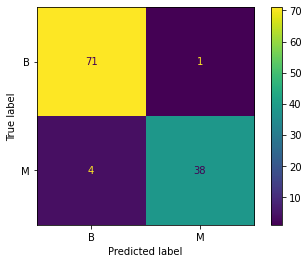

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

                      Abaixo, métricas que variam o cutoff                      
                               Classe positiva: M                               


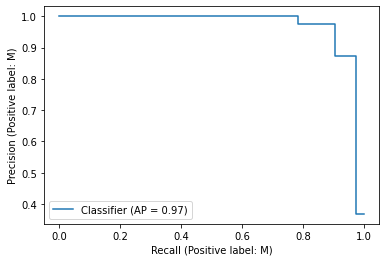

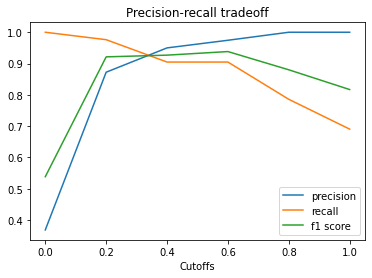

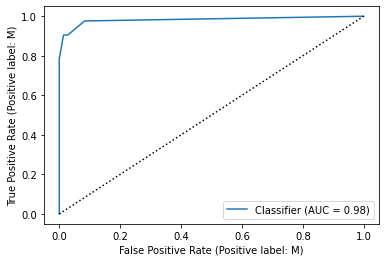

In [28]:
_ = clf_metrics(knn, X_test_ss, y_test, cutoff=0.5, label_metrica="teste", 
                print_plot=True, plot_conf_matrix=True, print_cr=True,
                plot_prc=True, plot_roc=True, 
                pos_label="M")

Métricas de avaliação de train - com cutoff = 0.50


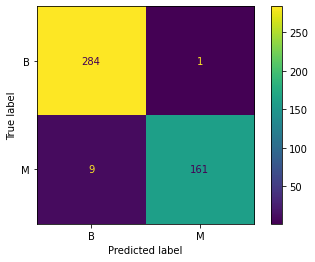

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       285
           M       0.99      0.95      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



In [29]:
_ = clf_metrics(knn, X_train_ss, y_train, cutoff=0.5, label_metrica="train", 
                print_plot=True, plot_conf_matrix=True, print_cr=True,
                plot_prc=False, plot_roc=False, 
                pos_label="M")

Note como a escolha da classe positiva muda a análise!

Métricas de avaliação de teste - com cutoff = 0.50


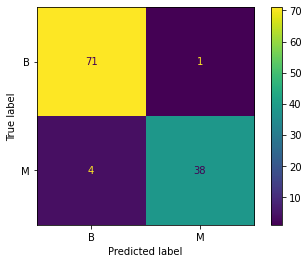

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

                      Abaixo, métricas que variam o cutoff                      
                               Classe positiva: M                               


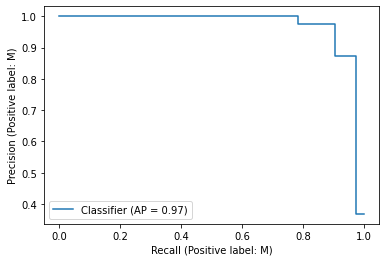

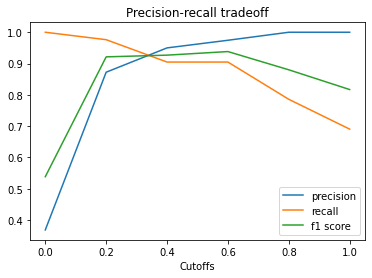

In [30]:
_ = clf_metrics(knn, X_test_ss, y_test, cutoff=0.5, label_metrica="teste", 
                print_plot=True, plot_conf_matrix=True, print_cr=True,
                plot_prc=True, plot_roc=False, 
                pos_label="M")

Métricas de avaliação de teste - com cutoff = 0.50


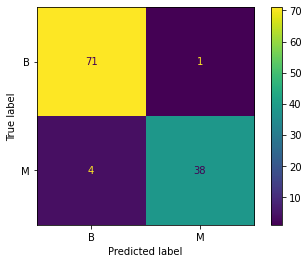

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

                      Abaixo, métricas que variam o cutoff                      
                               Classe positiva: B                               


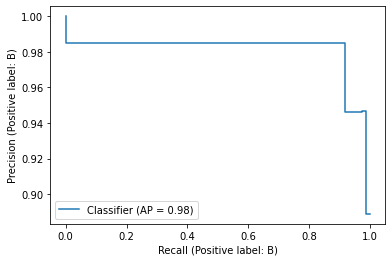

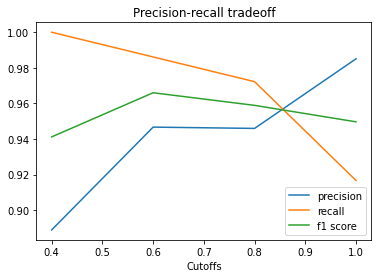

In [31]:
_ = clf_metrics(knn, X_test_ss, y_test, cutoff=0.5, label_metrica="teste", 
                print_plot=True, plot_conf_matrix=True, print_cr=True,
                plot_prc=True, plot_roc=False, 
                pos_label="B")

Uma coisa que podemos fazer pra melhorar o recall da classe M é abaixar o cutoff!!

Métricas de avaliação de teste - com cutoff = 0.05


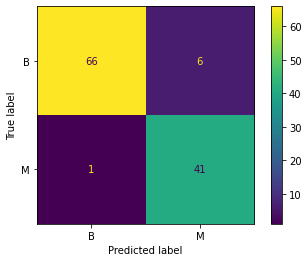

              precision    recall  f1-score   support

           B       0.99      0.92      0.95        72
           M       0.87      0.98      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114

                      Abaixo, métricas que variam o cutoff                      
                               Classe positiva: M                               


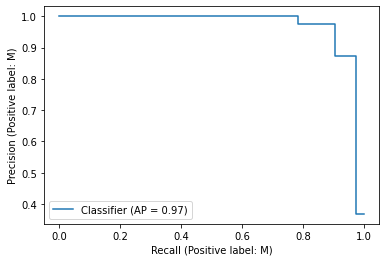

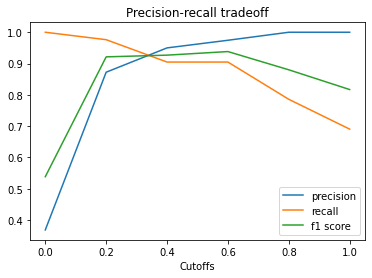

In [32]:
_ = clf_metrics(knn, X_test_ss, y_test, cutoff=0.05, label_metrica="teste", 
                print_plot=True, plot_conf_matrix=True, print_cr=True,
                plot_prc=True, plot_roc=False, 
                pos_label="M")

O que vamos aprender jaja é como mudar a performance do modelo, sem mexer no cutoff -- mexendo nos hiperparâmetros!

__________

Vamos fazer também a validação cruzada!

Mas uma importante alteração é necessária... Se fizermos como antes, usando o target original diretamente:

```python
from sklearn.model_selection import KFold, cross_validate

grupo = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = "f1"

results = cross_validate(estimator=estimador,
                         X=X_train, y=y_train,
                         cv=grupo,
                         scoring=metrica,
                         return_train_score=True)
```
Teremos um erro (teste!)

In [33]:
from sklearn.model_selection import KFold, cross_validate

grupo = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = "recall"

results = cross_validate(estimator=knn,
                         X=X_train_ss, y=y_train,
                         cv=grupo,
                         scoring=metrica,
                         return_train_score=True)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1901, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1544, in precision_recall_fscore_support
  

C:\Users\andre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1901, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1544, in precision_recall_fscore_support
  

Não há problema algum em utilizar as classes originais quando deseja-se avaliar o modelo final com a matriz de confusão ou o classification_report. Internamente, é feita um mapeamento pra 0 e 1.

Mas, pra usar o cross_validate, este mapa não é feito. Daí, é necessário que seja explicitamente indicada este mapeamento, indicando qual é a **classe positiva**, isto é, qual a classe referente à qual calcularemos as métricas de avaliação. Pra isso, precisamos:

- Indicar qual é a classe positiva (valor 1) na hora de indicar a métrica a ser calculada -- mas pra isso, a função respectiva da métrica deve ser usada na função `make_scorer`, junto com o argumento `pos_label`

Vejamos:

Discutimos que o recall da classe "M" é o que queremos otimizar. Então, vamos, antes de tudo, fazer a CV pra essa métrica:

In [34]:
from sklearn.metrics import recall_score, make_scorer

metrica = make_scorer(recall_score, pos_label="M")

results = cross_validate(estimator=knn,
                         X=X_train_ss, y=y_train,
                         cv=grupo,
                         scoring=metrica,
                         return_train_score=True)

In [35]:
pd.DataFrame(results)

,fit_time,score_time,test_score,train_score
0,0.001991,0.006998,0.900000,0.950000
1,0.001999,0.004998,0.956522,0.952381
2,0.003995,0.005998,0.950000,0.946667
3,0.004001,0.009993,0.944444,0.934211
4,0.013992,0.010991,0.909091,0.949686
5,0.004997,0.010992,0.950000,0.933333
6,0.002997,0.004997,0.900000,0.946667
7,0.002999,0.006994,0.882353,0.934641
8,0.002999,0.005994,0.750000,0.949367
9,0.003996,0.008995,0.947368,0.933775


Chamando a nossa função, mas agora com o `make_scorer` sendo o nosso argumento `scoring`


Distribuição da métrica de avaliação score:


,test_score,train_score
count,20.000000,20.000000
mean,0.896818,0.944865
std,0.145105,0.006841
min,0.400000,0.931250
25%,0.829545,0.941751
50%,0.925000,0.944615
75%,1.000000,0.946992
max,1.000000,0.957576



Distribuição de score de treino


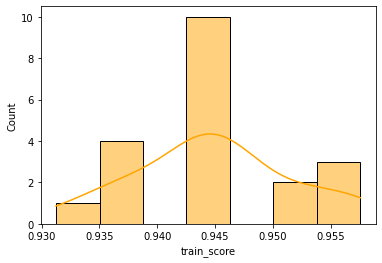


Distribuição de score de teste


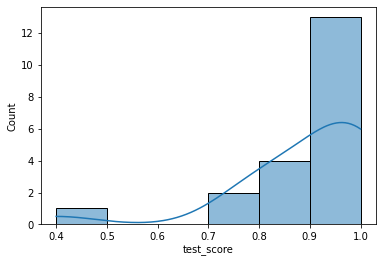


As duas juntas (compara a variância!)


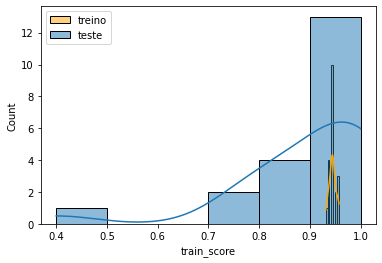

################################################################################


,fit_time,score_time,test_score,train_score
0,0.005999,0.008993,1.000000,0.945455
1,0.005998,0.007994,0.800000,0.951515
2,0.005976,0.007027,0.933333,0.954839
3,0.004998,0.007994,1.000000,0.944444
4,0.008996,0.008997,1.000000,0.950617
5,0.006999,0.018985,0.916667,0.943038
6,0.006000,0.009992,1.000000,0.944099
7,0.005996,0.007995,0.888889,0.937888
8,0.009993,0.014990,0.750000,0.945783
9,0.004000,0.008994,1.000000,0.944785


In [36]:
metrica = make_scorer(recall_score, pos_label="M")

calc_cv(knn, X_train_ss, y_train, n_splits=20, scoring=metrica, n_jobs=-1, verbose=0, plot_distros=True)

O modelo não teve uma performance muito ruim, mas podemos melhorar! Afinal, um modelo de tamanha importância não pode ter uma margem de erro muito grande, não é mesmo?

Vamos iniciar o ciclo de melhorias para ver se conseguimos melhorar a performance do modelo, em um processo que é muitas vezes chamado de **tunning**


____
____
____

## 2) Ferramentas especiais

Vamos agora ver algumas ferramentas especiais do sklearn que nos ajudam no desenvolvimento de modelos!

### Pipeline

O [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) é uma estrutura que o sklearn proporciona a fim de garantir que possamos em uma única estrutura passar **o estimador e o transformador** (e muitas outras coisas). Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/compose.html#pipeline). 

Vamos ver a seguir como esta estrutura funciona:

A vida antiga, antes da pípeline, era assim:

In [37]:
# X = df.drop(columns="diagnosis")
# y = df["diagnosis"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.2, random_state=42,
#                                                     stratify=y)

# # ===================================

# ss = StandardScaler().fit(X_train)

# X_train_ss = pd.DataFrame(ss.transform(X_train), columns=X_train.columns, index=X_train.index)
# X_test_ss = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)

# # ===================================
# # PASSO 1 

# # quando instanciamos a classe, é que escolhemos os valores dos hiperparâmetros
# knn = KNeighborsClassifier(n_neighbors=5, 
#                            weights='uniform',
#                            metric="euclidean").fit(X_train_ss, y_train)

# y_pred = knn.predict(X_test_ss)

Mas agora, conhecemnos a pipeline!

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
X = df.drop(columns="diagnosis")
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)

# ===================================

# lista de tuplas, onde cada tupla é um passo a ser feito, sequencialmente, na pipeline
# cada tupla tem a sintaxe ("nome_do_passo", ObjetoDoPasso())

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier(n_neighbors=5, weights='uniform', metric="euclidean"))]

# passo pra pipeline os dados ORIGINAIS!!!

pipe = Pipeline(lista_etapas).fit(X_train, y_train)

In [40]:
pipe

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(metric='euclidean'))])

In [41]:
# aqui tbm passamos os dados originais!

pipe.predict(X_test)

array(['B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M'], dtype=object)

Dá pra ser ainda mais enxuto no código:

In [42]:
pipe = Pipeline([("std_scaler", StandardScaler()), 
                 ("knn", KNeighborsClassifier(n_neighbors=5, 
                                              weights='uniform', 
                                              metric="euclidean"))]).fit(X_train, y_train)

pipe

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(metric='euclidean'))])

**Para o train-test split normal**

Métricas de avaliação de teste - com cutoff = 0.50


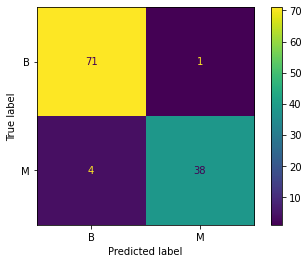

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [43]:
# passei o objeto pipe como estimador, e os dados de teste originais!!!

_ = clf_metrics(pipe, X_test, y_test, cutoff=0.5, label_metrica="teste", 
                print_plot=True, plot_conf_matrix=True, print_cr=True,
                plot_prc=False, plot_roc=False, 
                pos_label="M")

**Para a validação cruzada**


Distribuição da métrica de avaliação score:


,test_score,train_score
count,20.000000,20.000000
mean,0.896818,0.944865
std,0.145105,0.006841
min,0.400000,0.931250
25%,0.829545,0.941751
50%,0.925000,0.944615
75%,1.000000,0.946992
max,1.000000,0.957576



Distribuição de score de treino


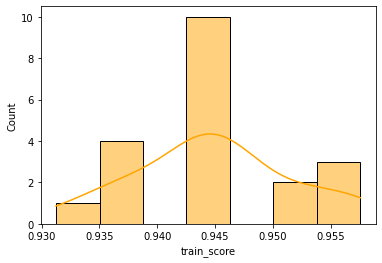


Distribuição de score de teste


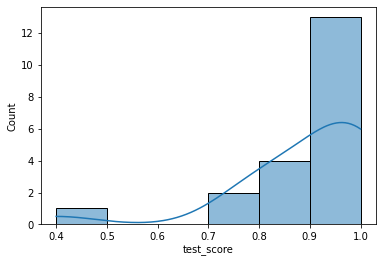


As duas juntas (compara a variância!)


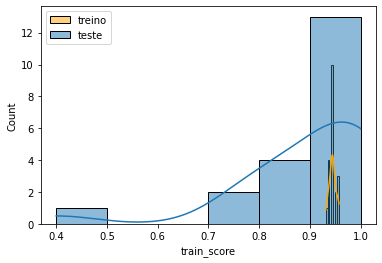

################################################################################


,fit_time,score_time,test_score,train_score
0,0.008999,0.006992,1.000000,0.945455
1,0.008994,0.006995,0.800000,0.951515
2,0.007996,0.006995,0.933333,0.954839
3,0.007997,0.008003,1.000000,0.944444
4,0.051968,0.013997,1.000000,0.950617
5,0.010994,0.008996,0.916667,0.943038
6,0.041974,0.008997,1.000000,0.944099
7,0.009995,0.008000,0.888889,0.937888
8,0.035980,0.008994,0.750000,0.945783
9,0.014993,0.021985,1.000000,0.944785


In [44]:
metrica = make_scorer(recall_score, pos_label="M")

# passando os dados originais e o pipe! (dados de treino pq é a validação cruzada)

calc_cv(pipe, X_train, y_train, n_splits=20, scoring=metrica, n_jobs=-1, verbose=0, plot_distros=True)

Uma boa ideia é usar o [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html), pois ele mantém a estratificação do target dentro de cada split!

Isso é sobretudo importante pra dados desbalanceados (no target)


Distribuição da métrica de avaliação score:


,test_score,train_score
count,20.000000,20.000000
mean,0.911806,0.944281
std,0.133543,0.007442
min,0.500000,0.931677
25%,0.875000,0.938272
50%,1.000000,0.944444
75%,1.000000,0.950311
max,1.000000,0.956790



Distribuição de score de treino


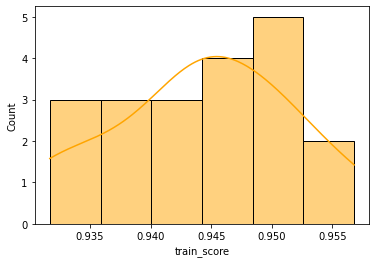


Distribuição de score de teste


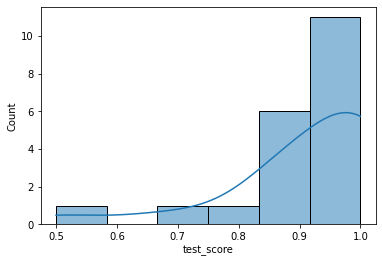


As duas juntas (compara a variância!)


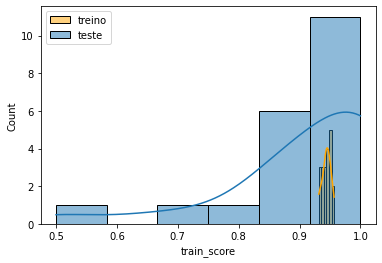

################################################################################


,fit_time,score_time,test_score,train_score
0,0.007994,0.006996,1.000000,0.931677
1,0.007998,0.006997,1.000000,0.950311
2,0.007997,0.006995,0.888889,0.956522
3,0.009994,0.012992,0.777778,0.950311
4,0.016990,0.011993,0.888889,0.944099
5,0.022986,0.017992,1.000000,0.950311
6,0.052968,0.009993,1.000000,0.944099
7,0.010992,0.009993,1.000000,0.944099
8,0.017992,0.007994,0.888889,0.950311
9,0.018990,0.006995,0.666667,0.950311


In [45]:
calc_cv(pipe, X_train, y_train, n_splits=20, scoring=metrica, n_jobs=-1, verbose=0, plot_distros=True, stratified=True)

______

### Gridsearch

O [Gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) é uma estrutura que o sklearn proporciona para que seja feita **a busca exaustiva de hiperparâmetros de um estimador**.

Na prática, o que o gridsearch faz é **treinar diversos modelos com diferentes combinações de hiperparâmetros**, de modo a manter o melhor deles como o modelo final, tudo automaticamente! 

Tudo o que precisamos fazer é indicar quais os hiperparâmetros que queremos procurar: a **grade**!

<img src="https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-6.png" width=500>

É muito comum também passarmos o **Pipeline** como argumento do gridsearch!

Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/grid_search.html#grid-search). 

Vamos ver a seguir como esta estrutura funciona:

O Gridsearch avalia o melhor modelo segundo a métrica que passamos em `scoring`. [Clique aqui](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) para ver as métricas disponíveis por padrão.

Mas o GS vai além: ele não calcula a métrica uma única vez, mas sim **várias vezes**, conforme especificado pelo parâmetro `cv`. No fim, o melhor modelo é o que tem o melhor scoring **médio** entre as vezes que é calculado.

O "cv" quer dizer **Cross Validation**, o método mais seguro de realizar um treinamento e avaliação de um modelo que conhecemos na aula passada!

<img src="https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600> 

Com a validação cruzada, garantimos uma avaliação justa de cada um dos modelos candidatos (cada um construído com uma combinação diferente de hiperparâmetros).

Assim, sabemos que a melhor combinação de hiperparâmetros a ser encontrada não estará de qualquer forma "overfitada" em particularidades da base de treino!

Vamos colocar tudo em uma única célula:

In [46]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [47]:
len(range(2, 21))*2*2*5

380

In [48]:
X = df.drop(columns="diagnosis")
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)


# essa é a nossa pipeline -- todos os passos!
pipe = Pipeline([("std_scaler", StandardScaler()),
                 ("knn", KNeighborsClassifier())])

# os valores da grade de hiperparametros que vamos variar!
# formato do dict:
# {"id_do_passo__hiper_parametro" : [lista de valores a serem variados]}

grade_de_parametros = {"knn__n_neighbors" : range(2, 21),
                       "knn__weights" : ["uniform", "distance"],
                       "knn__metric" : ["manhattan", "euclidean"]}

# é o critério que usaremos pra escolher qual é os melhroes valores pros hiperparametros
# (esse critério é exatamente o que queremos otimizar, em termos da performance do modelo!!)
metrica = make_scorer(recall_score, pos_label="M")

# estratégia do cv interno usado no grid search
# geralmente, nao precisamos de muitos splits pro gridsearch... 5 ou 10 costuma ser suficiente
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_knn = GridSearchCV(estimator = pipe,
                        param_grid = grade_de_parametros,
                        scoring = metrica,
                        cv = kf,
                        n_jobs=-1, verbose=10).fit(X_train, y_train)

Fitting 5 folds for each of 76 candidates, totalling 380 fits


In [49]:
grid_knn

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

O GS treinado tem diversos atributos super úteis e interessantes! Vamos dar uma olhada neles:

`.best_estimator_`: retorna quais as escolhas do Pipeline que produziram o melhor modelo. No que diz respeito ao modelo, temos exatamente quais os parâmetros escolhidos!

In [50]:
grid_knn.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3))])

`.best_params_`: retorna os parâmetros testados na grade que produziram o melhor modelo.

In [51]:
grid_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}

`.best_score_`: retorna a **média cross-validada da métrica de interesse** do melhor modelo. Como esse é o valor médio construído usando CV, este é estatisticamente o valor mais realístico a ser atribuído à performance do modelo!

In [52]:
grid_knn.best_score_

0.9470588235294117

`.cv_results_`: diversas informações do processo feito pelo GS

In [53]:
cv_results_df = pd.DataFrame(grid_knn.cv_results_).sort_values("rank_test_score")

cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.010595,0.002575,0.016998,0.002281,manhattan,3,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,1.000000,0.911765,0.911765,0.970588,0.947059,0.034300,1
3,0.012005,0.003292,0.011199,0.002023,manhattan,3,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,1.000000,0.911765,0.911765,0.970588,0.947059,0.034300,1
5,0.018189,0.011543,0.016790,0.013607,manhattan,4,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,1.000000,0.911765,0.911765,0.970588,0.947059,0.034300,1
40,0.009236,0.002149,0.015550,0.003853,euclidean,3,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.941176,1.000000,0.911765,0.882353,0.941176,0.935294,0.039019,4
41,0.009796,0.001598,0.007395,0.001020,euclidean,3,distance,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.941176,1.000000,0.911765,0.882353,0.941176,0.935294,0.039019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,0.010396,0.001020,0.018386,0.004669,manhattan,18,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.882353,1.000000,0.794118,0.852941,0.882353,0.882353,0.067069,70
28,0.008394,0.001019,0.017190,0.002481,manhattan,16,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.882353,1.000000,0.794118,0.852941,0.882353,0.882353,0.067069,70
70,0.009595,0.001959,0.015990,0.002757,euclidean,18,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.882353,0.970588,0.794118,0.882353,0.882353,0.882353,0.055805,70
37,0.008795,0.001166,0.014192,0.006611,manhattan,20,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.882353,1.000000,0.794118,0.852941,0.882353,0.882353,0.067069,70


____________

Agora sim, podemos avaliar a generalização final (base de teste)

Métricas de avaliação de teste - com cutoff = 0.50


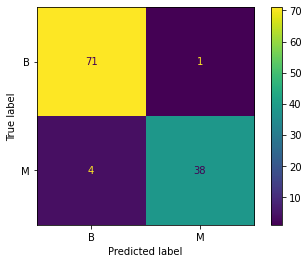

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [54]:
pipe_antigo = Pipeline([("std_scaler", StandardScaler()), 
                        ("knn", KNeighborsClassifier(n_neighbors=5, 
                                                     weights='uniform', 
                                                     metric="euclidean"))]).fit(X_train, y_train)

_ = clf_metrics(pipe_antigo, X_test, y_test, cutoff=0.5, label_metrica="teste", 
                print_plot=True, plot_conf_matrix=True, print_cr=True,
                plot_prc=False, plot_roc=False, 
                pos_label="M")

Métricas de avaliação de teste - com cutoff = 0.50


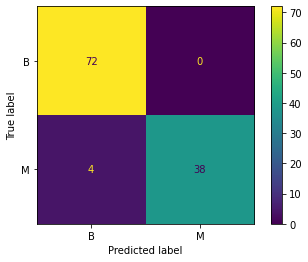

              precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [55]:
_ = clf_metrics(grid_knn, X_test, y_test, cutoff=0.5, label_metrica="teste", 
                print_plot=True, plot_conf_matrix=True, print_cr=True,
                plot_prc=False, plot_roc=False, 
                pos_label="M")

________
_______
______

Sua vez! Faça agora uma estrutura de Pipeline + GS para o Logit, e depois compare o melhor logit com o melhor knn. Qual é o melhor modelo final?

In [56]:
# pra casa
# teste l1, l2 e elastic net, poly features, etc etc

____
____
____

## 3) KNN para regressão

O KNN é nosso primeiro exemplo de algoritmo que pode ser utilizado para ambos os problemas de classificação e regressão!

A ideia é bem simples: o target atribuído a uma nova observação é igual à **média do target das $k$ observações mais próximas**

<img src="https://bookdown.org/f100441618/bookdown-regresion/www/KNN.jpg" width=500>

Naturalmente, também para regressão o parâmetro $k$ e a métrica de distância são hiperparâmetros importantes:

<img src="https://i.stack.imgur.com/gAILq.png" width=500>

A classe no sklearn é a [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). Dê uma olhada no User Guide e também no [RadiusNeighborsRegressor!](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor)

In [57]:
df = pd.read_csv("../datasets/house_prices.csv")

X = df.drop(columns=["Id", "SalePrice"])
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.select_dtypes(include=np.number).dropna(axis="columns")
X_test = X_test.loc[:, X_train.columns]

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [103]:
pipe_reg = Pipeline([("std_scaler", StandardScaler()),
                 ("knn", KNeighborsRegressor())])

grade_de_parametros = {"knn__n_neighbors" : range(2, 21),
                       "knn__weights" : ["uniform", "distance"],
                       "knn__metric" : ["manhattan", "euclidean"]}

metrica = "neg_mean_absolute_error"

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_knn_reg = GridSearchCV(estimator = pipe_reg,
                            param_grid = grade_de_parametros,
                            scoring = metrica,
                            cv = kf,
                            n_jobs=-1, verbose=10, return_train_score=True).fit(X_train, y_train)

Fitting 5 folds for each of 76 candidates, totalling 380 fits


In [104]:
grid_knn_reg.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 10,
 'knn__weights': 'distance'}

In [105]:
_ = calc_reg_metrics(grid_knn_reg, X_train, y_train, label="treino", plot=False, dist_resids=False, print_stuff=True)

_ = calc_reg_metrics(grid_knn_reg, X_test, y_test, label="teste", plot=False, dist_resids=False, print_stuff=True)


Métricas de avaliação (dados de treino):

R^2: 1.00
MAE: 7.11
RMSE: 171.73
MAPE: 0.00%

Métricas de avaliação (dados de teste):

R^2: 0.82
MAE: 20555.39
RMSE: 36794.57
MAPE: 11.74%


In [107]:
grid_knn_reg.best_score_

-19788.67549324904

E se quisermos escolher uma combinação que seja "boa" no que diz respeito à comparação (delta) entre métricas de treino e teste?

Pra isso, usamos a função abaixo (vide o modulo `ml_utils` pra definição)!

In [121]:
best_params_delta = calc_best_params_delta(grid_knn_reg, print_deltas=True)

,mean_test_score,mean_train_score,delta
36,20850.490263,19628.843164,1221.647099
30,20524.836939,19291.997763,1232.839176
32,20657.245194,19393.153656,1264.091538
34,20780.438168,19507.059031,1273.379137
28,20457.315367,19161.547727,1295.767640
...,...,...,...
47,22203.852753,5.328608,22198.524145
45,22450.106060,5.328523,22444.777537
43,22905.070835,5.328441,22899.742394
41,23453.890011,5.328344,23448.561667


In [122]:
best_params_delta

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}

Agora que temos uma boa combinação de hiperparâmetros (que não overfita, segundo o critério do `delta`), temos que treinar um modelo (pipeline) com esse conjunto de hiperparametros!

In [128]:
pipe_reg_best_delta = Pipeline([("std_scaler", StandardScaler()),
                                ("knn", KNeighborsRegressor(**best_params_delta))]).fit(X_train, y_train)

_ = calc_reg_metrics(pipe_reg_best_delta, X_train, y_train, label="treino", plot=False, dist_resids=False, print_stuff=True)

_ = calc_reg_metrics(pipe_reg_best_delta, X_test, y_test, label="teste", plot=False, dist_resids=False, print_stuff=True)


Métricas de avaliação (dados de treino):

R^2: 0.82
MAE: 19127.47
RMSE: 32690.13
MAPE: 10.62%

Métricas de avaliação (dados de teste):

R^2: 0.79
MAE: 21140.53
RMSE: 39984.98
MAPE: 12.16%


___________

In [62]:
# a como melhorar esse overfitting??

Limitando o k, pra fugir de overfitting

In [68]:
pipe_reg = Pipeline([("std_scaler", StandardScaler()),
                 ("knn", KNeighborsRegressor())])

grade_de_parametros = {"knn__n_neighbors" : range(50, 100),
                       "knn__weights" : ["uniform"],
                       "knn__metric" : ["manhattan", "euclidean"]}

metrica = "neg_mean_absolute_error"

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_knn_reg = GridSearchCV(estimator = pipe_reg,
                            param_grid = grade_de_parametros,
                            scoring = metrica,
                            cv = kf,
                            n_jobs=-1, verbose=10, return_train_score=True).fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [69]:
grid_knn_reg.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 50, 'knn__weights': 'uniform'}

In [70]:
_ = calc_reg_metrics(grid_knn_reg, X_train, y_train, label="treino", plot=False, dist_resids=False, print_stuff=True)

_ = calc_reg_metrics(grid_knn_reg, X_test, y_test, label="teste", plot=False, dist_resids=False, print_stuff=True)


Métricas de avaliação (dados de treino):

R^2: 0.78
MAE: 21708.03
RMSE: 36547.09
MAPE: 12.12%

Métricas de avaliação (dados de teste):

R^2: 0.75
MAE: 23263.94
RMSE: 43657.65
MAPE: 13.61%


Usando nossa função do critério baseado no delta novamente:

In [97]:
calc_best_params_delta(grid_knn_reg, print_deltas=True)

,mean_test_score,mean_train_score,delta
85,25895.664287,25596.030248,299.634040
37,24768.300796,24467.355202,300.945594
38,24807.351454,24500.258587,307.092867
45,25068.044299,24759.097156,308.947143
44,25025.294780,24716.338275,308.956505
...,...,...,...
52,24637.623251,23972.222973,665.400279
51,24590.622800,23908.139632,682.483168
54,24771.946932,24089.206890,682.740042
55,24818.711349,24130.700676,688.010673


{'knn__metric': 'euclidean', 'knn__n_neighbors': 85, 'knn__weights': 'uniform'}

# Lição de casa

tentar melhorar a função do `delta`, pensando em um critério pra escolha do melhor modelo (melhor combinação de hiperparâmetros), que leve em consideração tanto o delta quanto um valor "bom" pra métrica de teste!